In [99]:
import matplotlib.pyplot as plt
import csv
import pathlib
import numpy as np
import pandas as pd
import re
import open3d as o3d

In [115]:
# csv_load
status = "midlle"

result_path = pathlib.Path("../../demo/data/result")
result_csvs = list(result_path.glob("kannyou*.csv"))
result_csvs = [p for p in result_path.glob('kannyou*.csv') if re.search(r'.*[0-9]_nIntervals_.*.csv', str(p))]
filtered_path = [csv for csv in result_csvs if status in str(csv)]
leaves = [np.loadtxt(str(path), delimiter=' ') for path in filtered_path]

In [116]:
filtered_path

[WindowsPath('../../demo/data/result/kannyou_opt_curves_midlle_0_nIntervals_32.csv'),
 WindowsPath('../../demo/data/result/kannyou_opt_curves_midlle_1_nIntervals_32.csv'),
 WindowsPath('../../demo/data/result/kannyou_opt_curves_midlle_2_nIntervals_32.csv')]

<IPython.core.display.Javascript object>


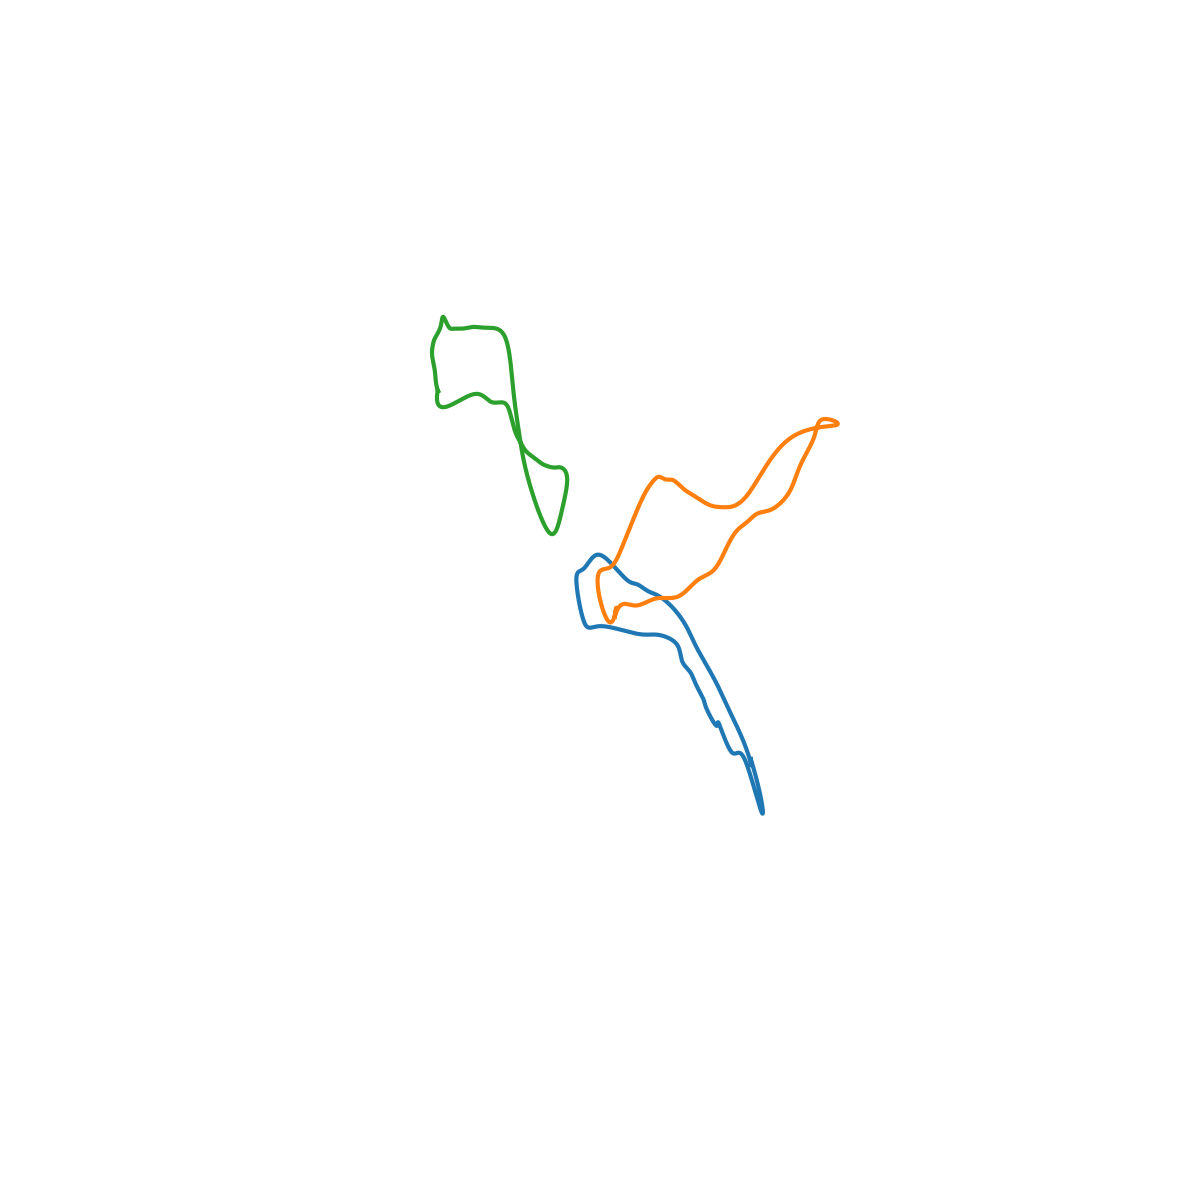

In [117]:
def rotation_mat(angle):
    Rx = np.array([[1,0,0],
                 [0, np.cos(angle[0]), -np.sin(angle[0])],
                 [0, np.sin(angle[0]), np.cos(angle[0])]])

    Ry = np.array([[np.cos(angle[1]), 0, np.sin(angle[1])],
                 [0,1,0],
                 [-np.sin(angle[1]), 0, np.cos(angle[1])]])

    Rz = np.array([[np.cos(angle[2]), -np.sin(angle[2]), 0],
                 [np.sin(angle[2]), np.cos(angle[2]), 0],
                 [0,0,1]])
    return Rz@Rx@Ry

R_mirror = np.array([[-1,0,0],
                    [0,1,0],
                    [0,0,1]])

%matplotlib notebook
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))
ax.view_init(elev=10, azim=10)

ax.axis("off")

for i in range(len(leaves)):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(leaves[i])
    #pcd.rotate(np.linalg.inv(R),(0,0,0))
    #pcd.rotate(R_mirror,(0,0,0))
    s_c = np.array(pcd.points)
    x_q, y_q, z_q = s_c[:,0], s_c[:,1], s_c[:,2]
    ax.plot(x_q, y_q, z_q,"-",lw=3)

plt.show()